In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten, Input, MaxPooling2D 
import random
import tensorflow as tf
import os
import glob
import cv2 as cv

In [2]:
daisy_dir = glob.glob(os.path.join(os.path.join('flowers','daisy'),'*'))
dandelion_dir = glob.glob(os.path.join(os.path.join('flowers','dandelion'),'*'))
rose_dir = glob.glob(os.path.join(os.path.join('flowers','rose'),'*'))
sunflower_dir = glob.glob(os.path.join(os.path.join('flowers','sunflower'),'*'))
tulip_dir = glob.glob(os.path.join(os.path.join('flowers','tulip'),'*'))

X_path = daisy_dir + dandelion_dir + rose_dir + sunflower_dir + tulip_dir
X = []

for f in X_path:
    X.append(np.array(cv.resize(cv.imread(f),(224,224),interpolation=cv.INTER_AREA)))

X = np.array(X)

In [3]:
X = X/255

In [4]:
daisy_label = np.zeros(len(daisy_dir))
dandelion_label = np.ones(len(dandelion_dir))
rose_label = 2*np.ones(len(rose_dir))
sunflower_label = 3*np.ones(len(sunflower_dir))
tulip_label = 4*np.ones(len(tulip_dir))

y = np.concatenate((daisy_label , dandelion_label , rose_label , sunflower_label , tulip_label))
y = to_categorical(y,5)

In [5]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [6]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
datagen = ImageDataGenerator(
          zoom_range=0.1,
          rotation_range=15,
          width_shift_range=0.1,
          height_shift_range=0.1,
          horizontal_flip=True,
          vertical_flip=True)

datagen.fit(X_train)

In [10]:
inp = Input((224,224,3))
conv1 = Conv2D(64,(5,5),padding='valid',activation='relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv1 = BatchNormalization()(conv1)

conv2 = Conv2D(96,(4,4),padding='valid', activation='relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv2 = BatchNormalization()(conv2)

conv3 = Conv2D(128,(3,3),padding='valid', activation='relu')(conv2)
conv3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv3 = BatchNormalization()(conv3)

conv4 = Conv2D(128,(3,3),padding='valid', activation='relu')(conv3)
conv4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv4 = BatchNormalization()(conv4)

flat = Flatten()(conv4)

dense1 = Dense(512,activation='relu')(flat)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64,activation='relu')(dense1)
dense2 = Dropout(0.1)(dense2)

out = Dense(5,activation='softmax')(dense2)

model = Model(inp,out)

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 107, 107, 96)      98400     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 53, 53, 96)        384 

In [11]:
model.compile(optimizer=Nadam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,
                     epochs=50,
                     batch_size=32,
                     validation_data=(X_val,y_val))

Epoch 1/50
108/108 [==============================] - 26s 238ms/step - loss: 0.9577 - accuracy: 0.6615 - val_loss: 3.0963 - val_accuracy: 0.2581
Epoch 2/50
108/108 [==============================] - 26s 238ms/step - loss: 0.7553 - accuracy: 0.7223 - val_loss: 3.1836 - val_accuracy: 0.2581
Epoch 3/50
108/108 [==============================] - 26s 238ms/step - loss: 0.5998 - accuracy: 0.7750 - val_loss: 1.7767 - val_accuracy: 0.3924
Epoch 4/50
108/108 [==============================] - 26s 238ms/step - loss: 0.4488 - accuracy: 0.8390 - val_loss: 1.1576 - val_accuracy: 0.6076
Epoch 5/50
108/108 [==============================] - 26s 238ms/step - loss: 0.3388 - accuracy: 0.8772 - val_loss: 0.9726 - val_accuracy: 0.6713
Epoch 6/50
108/108 [==============================] - 26s 238ms/step - loss: 0.2743 - accuracy: 0.9073 - val_loss: 1.0066 - val_accuracy: 0.6956
Epoch 7/50
108/108 [==============================] - 26s 238ms/step - loss: 0.2301 - accuracy: 0.9215 - val_loss: 1.0032 - val_ac

In [14]:
history.history

{'loss': [0.9576817750930786,
  0.7553046941757202,
  0.5998318791389465,
  0.44877827167510986,
  0.3388442397117615,
  0.2742655873298645,
  0.2301456183195114,
  0.18789269030094147,
  0.15369564294815063,
  0.1304706484079361,
  0.09597675502300262,
  0.10371972620487213,
  0.11180908232927322,
  0.08946734666824341,
  0.0700436383485794,
  0.0630280151963234,
  0.06351890414953232,
  0.060412101447582245,
  0.05840146169066429,
  0.06263688951730728,
  0.05376435071229935,
  0.04800088331103325,
  0.06472258269786835,
  0.053536608815193176,
  0.06668999791145325,
  0.06389039754867554,
  0.054057229310274124,
  0.05432694032788277,
  0.061530597507953644,
  0.05716143548488617,
  0.053757645189762115,
  0.05703215301036835,
  0.047585949301719666,
  0.03448539972305298,
  0.030566591769456863,
  0.05535980686545372,
  0.04253577068448067,
  0.04506503418087959,
  0.04889322444796562,
  0.04887155815958977,
  0.03835640102624893,
  0.051629167050123215,
  0.055197492241859436,
  0

Text(0.5, 1.0, 'Model Accuracy')

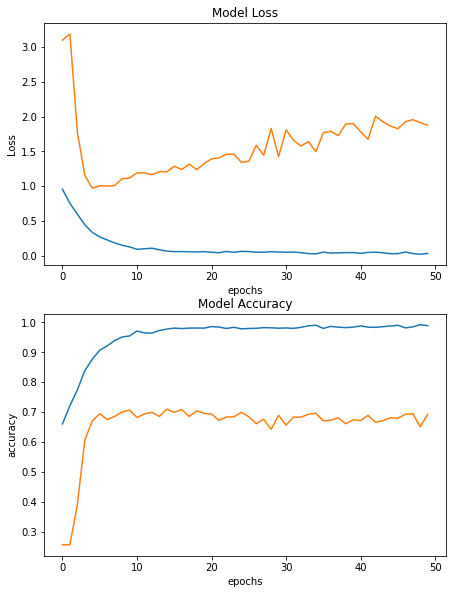

In [31]:
fig = plt.figure(figsize=(7.2,9.8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(50),history.history['loss'],label='Train Loss')
ax1.plot(range(50),history.history['val_loss'],label='Val Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(range(50),history.history['accuracy'],label='Train accuracy')
ax2.plot(range(50),history.history['val_accuracy'],label='Val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.set_title('Model Accuracy')


In [8]:
vgg = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False, weights='imagenet')

In [9]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
for layer in tf_model.layers[:20]:
    layer.trainable=False

In [10]:
tf_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
tf_model.compile(optimizer=Nadam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = tf_model.fit(X_train,y_train,
                       batch_size=1,
                       epochs=30,
                       validation_data=(X_val,y_val))

Epoch 1/30
